# Taller 4: Ceros de funciones

## Evaluación

- Se evaluará la resolución de los ejercicios con un coloquio con los docentes durante la clase.
- En caso de no asistir a clase, se debe entregar la resolución por mail a metnum.lab@gmail.com hasta el **viernes 22 de noviembre**, justificando todas las respuestas e incluyendo los **ejercicios opcionales**.

## Érase una vez en una vez ...

Son tiempos de guerra civil. Naves rebeldes han atacado desde una base secreta y han obtenido su primera victoria contra el malvado Imperio Galáctico. Durante la batalla, espías rebeldes lograron robar los planos secretos del arma más extrema del Imperio: la **Estrella de la Muerte**, una estación espacial blindada con suficiente potencia como para destruir un planeta entero. Es así como la nave conocida como el **Halcón Milenario** y comandada por **Han Solo** se encuentra en una misión especial: destruir la Estrella de la Muerte construida por el maléfico **Lord Sith**.

Cercanas a la Estrella se encuentran **naves estelares** protegiéndola, a la espera de la detección de intrusos rebeldes para destruirlos. Para evadir los radares de las naves estelares dispersas en su trayecto, el Halcón Milenario debe moverse lentamente en **línea recta** y con sus escudos desactivados.

En consecuencia, nuestro objetivo es decidir si es necesario enviar una señal de alerta a Han Solo en su trayecto a la Estrella de la Muerte cuando se encuentre a una **distancia crítica** de las naves estelares que la protegen. De esa forma, él podrá activar sus escudos y llegar a salvo a su destino).

You should consider upgrading via the '/home/juampi/HOME/.virtualenvs/tp3_metodos_bis/bin/python3 -m pip install --upgrade pip' command.


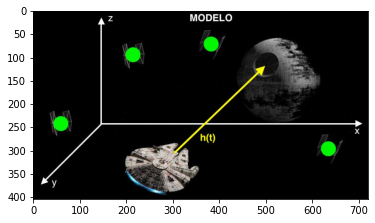

In [1]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

!pip -q install gdown
#https://drive.google.com/uc?id=file_id
!gdown -q -O trayectory.png https://drive.google.com/uc?id=1x8RJNK1dwH1Mb8T2aTovkkkXqNdJ65C9
img = mpimg.imread('trayectory.png')
plt.imshow(img)

Sean $y_1,\ \dots,\ y_n \in\mathbb{R}^3$ las ubicaciones de las naves estelares en el espacio (puntos verdes en la figura), y sea $h:[0,1]\to\mathbb{R}^3$ la función de trayectoria del Halcón Milenario, expresada como una trayectoria paramétrica en función del tiempo. Asumimos que la trayectoria es una **recta**, es decir $h(t) = at+b$, con $a,b\in\mathbb{R}^3$ (ver modelo en la figura). En el instante $t\in[0,1]$, Han Solo estará en la posición $h(t)$, y su **nivel de peligro**
está dado por:
\begin{equation}
A(t) \ =\ \sum_{i=1}^n {\frac{1}{\| h(t) - y_i\|_2}}
\end{equation}
Es decir, cada nave estelar aporta al nivel de peligro una cantidad que es inversamente proporcional a la distancia del Halcón Milenario a la nave estelar.  Si en algún instante $t\in[0,1]$ el nivel de peligro $A(t)$ es mayor o igual que un cierto **valor crítico** $C$, Han Solo deberá ser alertado para que active sus escudos y llegar a salvo a la Estrella de la Muerte.

## Objetivo

El objetivo del Taller es implementar y comparar métodos numéricos para hallar algún instante de tiempo donde se alcance un nivel de peligro crítico de modo de alertar a Han Solo.

## Ejercicio 1 - Función crítica
Plantear una ecuación no lineal $f(t)=0$ tal que una raíz de ella indique que Han Solo debe ser alertado (es decir, el nivel de peligro es crítico). 

**Solucion:**

**Queremos:**

$$A(x) = C \implies f(x) = 0$$

$$f(x) = \left( \sum_{i=1}^n {\frac{1}{\| h(t) - y_i\|_2}} \right) - C= 0$$

## Ejercicio 2: Newton-Raphson
**a)** Calcular explícitamente la derivada de $f$ y con ella completar el código a continuación. Además, plantear la iteración de Newton-Raphson y dar un valor inicial para hallar una raíz de $f$ con los siguientes valores:
 $$C=1, y_{1}=(2,3,-0.5), y_{2}=(2,0.5,0.5), a=(3,1,1), b=(1,1,-0.5)$$
**Nota:** Tener en cuenta las condiciones de convergencia de Newton-Raphson
 

$$f(t) = A(t)-C \implies f'(t) = A'(t) - C' \implies f'(t) = A'(t)$$

$$f'(t) = - \sum_{i=1}^{N}\frac{a^{T}(h(t)-y_{i})}{||h(t)-y_{i}||_{2}^{3}}$$

In [156]:
def dA(t):
    suma = 0
    
    for i in range(y.shape[0]):
        num = np.inner(a.reshape(-1,), (h(t) - y[i].reshape(-1,))).ravel()
        den = (np.linalg.norm(h(t)-y[i].reshape(-1,1)))**3
        assert not np.isclose(den, 0), 'dA'
        suma += num/den
    
    return -suma



import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Parámetros de la recta
a = np.array([3,1,1])
b = np.array([1,1,-0.5])

# Coordenadas de las naves estelares en R^{3 x n}
y = np.array([[2,3,-0.5], 
              [2,0.5,0.5]])

# Cota para el nivel de aturdimiento
C = 1


# Funcion h
def h(t):
    res = (a*t+b)
    return res

# Función a encontrar la raíz
def f(t):
    res = C-A(t)
    return res


# Derivada de A
def dA(t):
    suma = 0
    
    for i in range(y.shape[0]):
        num = np.dot(a, (h(t) - y[i]))
        den = (np.linalg.norm(h(t)-y[i]))**3
        assert not np.isclose(den, 0), 'dA'
        suma += num/den
    
    return -suma


# Derivada de F
def df(t):
  
    return -dA(t)

# Función de nivel de aturdimiento
def A(t):
    suma = 0
        
    for i in range(y.shape[0]):
        den = np.linalg.norm(h(t)-y[i])
        assert not np.isclose(den, 0), 'A'
        suma += 1/den
    
    return suma

In [157]:
# NEWTON-RAPHSON
def NewtonRaphson(x0, tol, iteraciones):
    x_ant = x0
    contador = 0
    seq_x = [x0]

    while (abs(f(x_ant)) > tol and contador < iteraciones):
        x = x_ant - (f(x_ant)/df(x_ant))

        seq_x.append(x)
        contador = contador + 1
        x_ant = x
  
    return (seq_x, x)

In [158]:
from scipy.misc import derivative
def G(t):
    return t - (f(t)/df(t))

def dG(t):
    return derivative(G, t)

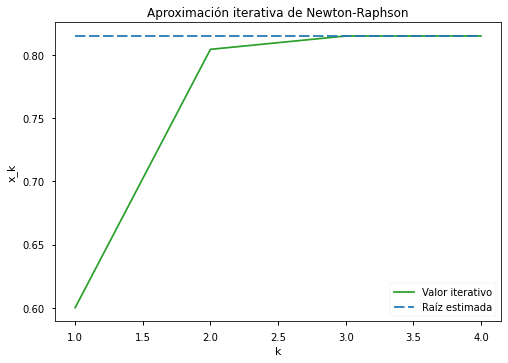

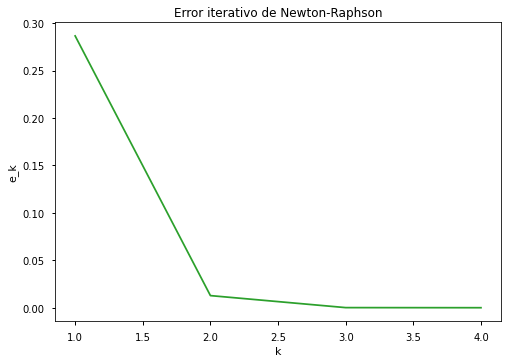

In [180]:
x0 = 0.6
tol = 0.00000001 # PROBAR OTROS VALORES
iteraciones = 40

seq_nr, value_nr = NewtonRaphson(x0, tol, iteraciones)
its_nr = np.arange(1, len(seq_nr)+1)
err_nr = np.vectorize(abs)(np.vectorize(f)(seq_nr))

fig1 = plt.figure()
mlt.style.use('seaborn-notebook')
ax1 = plt.axes()
ax1.set_xlabel('k')
ax1.set_ylabel('x_k')
ax1.set_title('Aproximación iterativa de Newton-Raphson')
ax1.plot(its_nr, seq_nr, c='C2', label='Valor iterativo')
if abs(f(value_nr)) < tol:
    ax1.plot(its_nr, np.full(its_nr.shape, value_nr), dashes=[6,2], c='C0', label='Raíz estimada')
    ax1.legend(fancybox=True)

fig2 = plt.figure()
ax2 = plt.axes()
ax2.set_xlabel('k')
ax2.set_ylabel('e_k')
ax2.set_title('Error iterativo de Newton-Raphson')
ax2.plot(its_nr, err_nr, c='C2', label='Valor iterativo')

**b)** Dada la función G de punto fijo formada a partir de la iteración de Newton Raphson, probar que cumple las condiciones del teorema de punto fijo en algún intervalo incluido en  [0,1]  con lo cual puede asegurarse la convergencia de la iteración de punto fijo dicho intervalo.

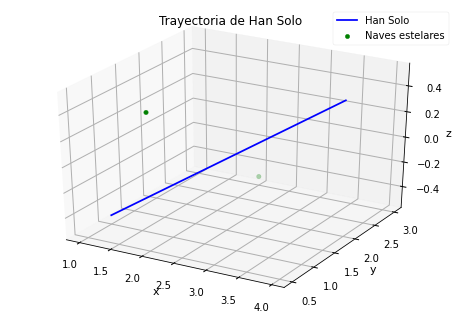

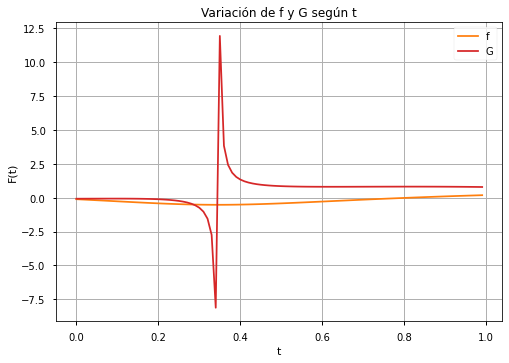

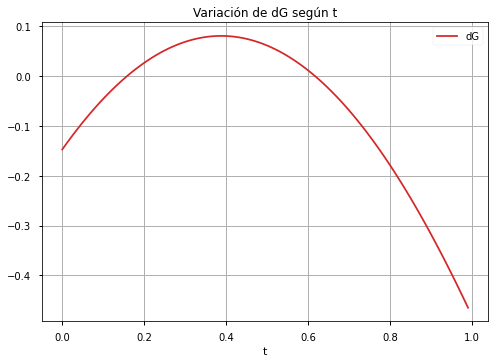

In [181]:
# Gráfico de la trayectoria
ts = np.arange(0, 1, 0.01)
xs = np.array([a*i + b for i in ts])
ys = np.array([np.array(i) for i in y])

fig1 = plt.figure()
mlt.style.use('seaborn-notebook')
ax1 = plt.axes(projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Trayectoria de Han Solo')
ax1.plot3D(xs.T[0], xs.T[1], xs.T[2], "blue", label="Han Solo")
ax1.scatter3D(ys.T[0], ys.T[1], ys.T[2], c="green", label="Naves estelares")
ax1.legend(fancybox=True)
ax2.grid()

# Gráfico de F y G
fs = np.vectorize(f)(ts)
gs = np.vectorize(G)(ts)

fig2 = plt.figure()
ax2 = plt.axes()
ax2.set_xlabel('t')
ax2.set_ylabel('F(t)')
ax2.set_title('Variación de f y G según t')
ax2.plot(ts, fs, c='C1',label='f')
ax2.plot(ts, gs, c='C3', label='G')
ax2.legend(fancybox=True)
ax2.grid()

# Gráfico de dG
dgs = np.vectorize(dG)(ts)

fig3 = plt.figure()
ax3 = plt.axes()
ax3.set_xlabel('t')
ax3.set_title('Variación de dG según t')
ax3.plot(ts, dgs, c='C3', label='dG')
ax3.legend(fancybox=True)
ax3.grid()

In [167]:
f(value_nr) == 0

True

In [166]:
G(value_nr) == value_nr

True

Para que se cumplan las condiciones del teorema del punto fijo, necesitamos que en algún intervalo contenido en el [0,1], la función G sea continua y derivable y que el valor máximo en módulo de la derivada de G en ese intervalo sea menor a 1.

Tomamos como intervalo el [0.7, 1], y podemos ver en el primer gráfico que la función G es continua y derivable, y en el segundo, vemos que el valor en módulo de su derivada es menor a 1. Por lo cual se cumplen todas las hipótesis pedidas anteriormente.

Además podemos ver que cuando f(x) = 0, G(x) = x.

## Ejercicio 3 - Bisección
Comparar las velocidades de convergencia de los métodos de Bisección y Newton-Raphson.
Para ello, basarse en $\{ x_{k}^{(M)}\}_{k=0,\ \ldots}$ que es la sucesión de puntos del método $M$ convergentes a la raíz $r$ de $f$, donde $M$ es Newton-Raphson o Bisección. Graficar y mostrar los valores del error $e^M_k=|r-x_{k}^{(M)}|$.

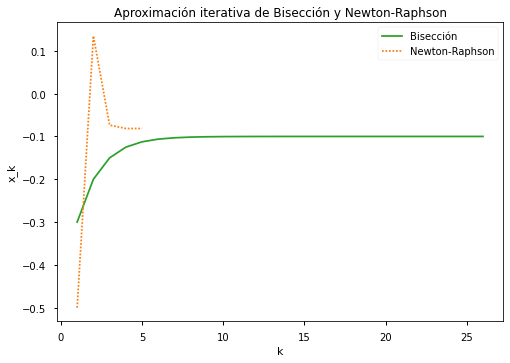

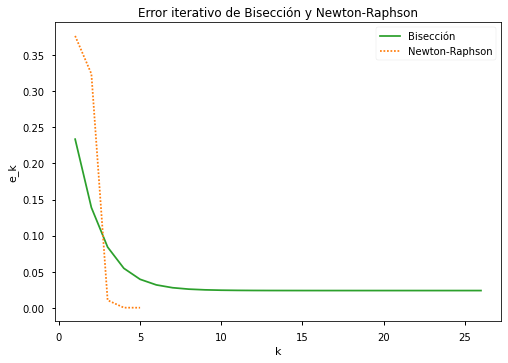

In [183]:
# BISECCIÓN

def Biseccion(x0, x1, tol, iteraciones):
    seq_p = []
    x_left = x0
    x_right = x1

    for c in range(iteraciones):
        # COMPLETAR CON LÍNEA DE ITERACIÓN DE BISECCIÓN
        p = (x_right + x_left) / 2
        fp = f(p)

        seq_p.append(p)

        if (abs(fp) < tol or (x_right-x_left)/2 < tol): break

        if (f(x_left)*fp > 0): 
            x_left = p;       
        else: 
            x_right = p;
  
    return (seq_p, p)
  
x0 = -0.5
x1 = -0.1
tol = 0.00000001 
iteraciones = 40

seq_bic, value_bic = Biseccion(x0, x1, tol, iteraciones)
its_bic = np.arange(1, len(seq_bic)+1)
err_bic = np.vectorize(abs)(np.vectorize(f)(seq_bic))

seq_nr, value_nr = NewtonRaphson(x0, tol, iteraciones)
its_nr = np.arange(1, len(seq_nr)+1)
err_nr = np.vectorize(abs)(np.vectorize(f)(seq_nr))

fig1 = plt.figure()
mlt.style.use('seaborn-notebook')
ax1 = plt.axes()
ax1.set_xlabel('k')
ax1.set_ylabel('x_k')
ax1.set_title('Aproximación iterativa de Bisección y Newton-Raphson')
ax1.plot(its_bic, seq_bic, c='C2', label='Bisección')
ax1.plot(its_nr, seq_nr, c='C1', dashes=[1,1], label='Newton-Raphson')
ax1.legend(fancybox=True)

fig2 = plt.figure()
ax2 = plt.axes()
ax2.set_xlabel('k')
ax2.set_ylabel('e_k')
ax2.set_title('Error iterativo de Bisección y Newton-Raphson')
ax2.plot(its_bic, err_bic, c='C2', label='Bisección')
ax2.plot(its_nr, err_nr, c='C1', label='Newton-Raphson', dashes=[1,1])
ax2.legend(fancybox=True)

Podemos ver que el método de Newton es notablemente más rápido que el método de bisección. Esto se debe a que el orden de convergencia del primero es cuadrático, mientras que el del segundo es de orden lineal. 

## Ejercicio 4 - Punto fijo
Mostrar otras dos funciones de punto fijo (diferentes a la del ejercicio 2) tales que la raíz de la ecuación no lineal del ejercicio 1 sea punto fijo de dichas funciones.

$$g(x) = 0.8150401264429092$$
$$g(x) = x$$
$$g(x) = f(x) + x$$

## Ejercicio 5 - Secante (Opcional)
Implementar el método de la Secante y compararlo con los anteriores en cuanto a velocidad de convergencia. 

[0.8303078459539517, 0.8127424622681456, 0.8150649400155705, 0.8150401672517713, 0.8150401275235031]


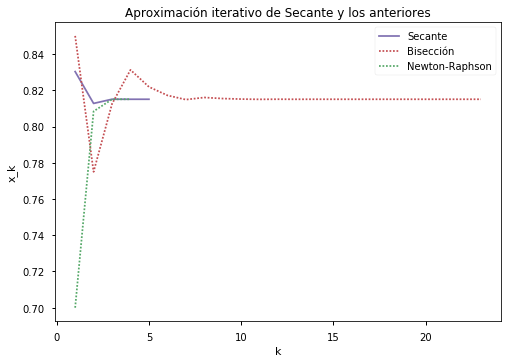

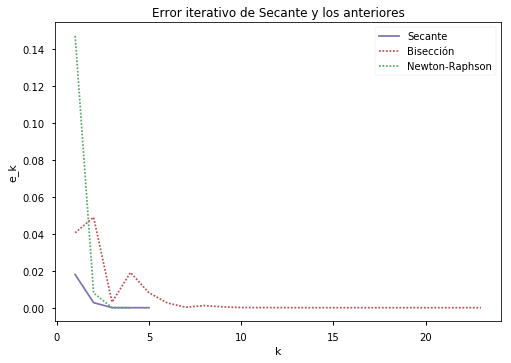

In [ ]:
# SECANTE

def Secante(x0, x1, tol, iteraciones):
    contador = 0
    seq_p = []
    p = x0
    x_prev = x0
    x_n = x1

        while contador < iteraciones:

        # COMPLETAR CON LÍNEA DE ITERACIÓN DE SECANTE
        p = ...
        fp = ...
        seq_p.append(p)

        if (abs(fp) < tol or abs(x_n-x_prev)/2 < tol): break 

        x_prev = x_n
        x_n = p
        # Y para Regula Falsi
        #if ...
        #else: ...

        contador = contador + 1
  
    return (seq_p, p)
  
x0 =  # COMPLETAR
x1 =  # COMPLETAR
tol = 0.00000001 
iteraciones = 40

seq_bic, value_bic = Biseccion(x0, x1, tol, iteraciones)
its_bic = np.arange(1, len(seq_bic)+1)
err_bic = np.vectorize(abs)(np.vectorize(F)(seq_bic))

seq_nr, value_nr = NewtonRaphson(x0, tol, iteraciones)
its_nr = np.arange(1, len(seq_nr)+1)
err_nr = np.vectorize(abs)(np.vectorize(F)(seq_nr))

seq_sec, value_sec = Secante(x0, x1, tol, iteraciones)
its_sec = np.arange(1, len(seq_sec)+1)
err_sec = np.vectorize(abs)(np.vectorize(F)(seq_sec))

fig1 = plt.figure()
mlt.style.use('seaborn-notebook')
ax1 = plt.axes()
ax1.set_xlabel('k')
ax1.set_ylabel('x_k')
ax1.set_title('Aproximación iterativo de Secante y los anteriores')
ax1.plot(its_sec, seq_sec, c='C3', label='Secante')
ax1.plot(its_bic, seq_bic, c='C2', dashes=[1,1], label='Bisección')
ax1.plot(its_nr, seq_nr, c='C1', dashes=[1,1], label='Newton-Raphson')
ax1.legend(fancybox=True)

fig2 = plt.figure()
mlt.style.use('seaborn-deep')
ax2 = plt.axes()
ax2.set_xlabel('k')
ax2.set_ylabel('e_k')
ax2.set_title('Error iterativo de Secante y los anteriores')
ax2.plot(its_sec, err_sec, c='C3', label='Secante')
ax2.plot(its_bic, err_bic, c='C2', dashes=[1,1], label='Bisección')
ax2.plot(its_nr, err_nr, c='C1', dashes=[1,1], label='Newton-Raphson')
ax2.legend(fancybox=True)

print(seq_sec)

<font color="color:red">Desarrolle su explicación aquí</font>